In [69]:
import numpy as np
data=np.load('part1a.npz')
data.files

['N', 'Svc_0_pmf', 'Lc', 'Ic_0', 'gamma']

In [70]:
np.sum((2,3,4))

9

In [71]:
N = data['N']
print(N)

100000.0


In [72]:
Svc_0_pmf = data['Svc_0_pmf']
print(Svc_0_pmf)

[[0.10953309 0.03300776 0.08179044 0.11593994]
 [0.03089752 0.08511994 0.04528764 0.05718283]
 [0.07471465 0.02495643 0.10236599 0.04256696]
 [0.01605863 0.08109608 0.09158212 0.00789999]]


In [73]:
Lc = data['Lc']
print(Lc)

[0.3 0.4 0.7 1. ]


In [74]:
Ic_0 = data['Ic_0']
print(Ic_0)

[47 90 51 65]


In [75]:
gamma = data['gamma']
print(gamma)

0.07142857142857142


In [76]:
from scipy import integrate
from itertools import product
import matplotlib.pyplot as plt
import matplotlib as mpl

beta_values = np.linspace(0,1,16)
t=np.linspace(1,120,120)

#print(beta_values)
#print(t)

In [77]:
def SIR_model(t, Y, betas, gamma):
    S_vector=Y[:16]
    I_vector=Y[16:20]
    R=Y[20]
    
    dSvc_dt= -(betas*S_vector*sum(I_vector))/N
    dIc_dt1= -np.sum((dSvc_dt[0], dSvc_dt[4], dSvc_dt[8], dSvc_dt[12]))-gamma*I_vector[0]
    dIc_dt2= -np.sum((dSvc_dt[1], dSvc_dt[5], dSvc_dt[9], dSvc_dt[13]))-gamma*I_vector[1]
    dIc_dt3= -np.sum((dSvc_dt[2], dSvc_dt[6], dSvc_dt[10], dSvc_dt[14]))-gamma*I_vector[2]
    dIc_dt4= -np.sum((dSvc_dt[3], dSvc_dt[7], dSvc_dt[11], dSvc_dt[15]))-gamma*I_vector[3]
    dIc_dt = np.concatenate((dIc_dt1, dIc_dt2, dIc_dt3, dIc_dt4), axis=None)
    dR_dt= gamma*sum(I_vector)
    RHS_vector=np.concatenate((dSvc_dt, dIc_dt, dR_dt),axis=None)

    return RHS_vector

In [78]:
initial_states = np.concatenate((Svc_0_pmf*N, Ic_0, 0), axis=None)
print(initial_states)

[10953.30923225  3300.77595232  8179.04434919 11593.99375796
  3089.75210416  8511.99369833  4528.76409871  5718.28254294
  7471.46489455  2495.64258153 10236.59890526  4256.69555713
  1605.86349244  8109.60840208  9158.21154258   789.99888857
    47.            90.            51.            65.
     0.        ]


In [79]:
soln_obj=integrate.solve_ivp(SIR_model, (t[0],t[-1]), initial_states, args=(beta_values, gamma), dense_output=True)

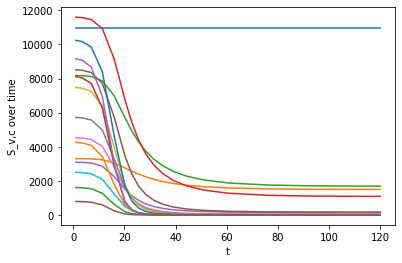

In [80]:
plt.plot(soln_obj.t, soln_obj.y[0:16].T)
plt.xlabel("t")
plt.ylabel("S_v,c over time")
plt.show()

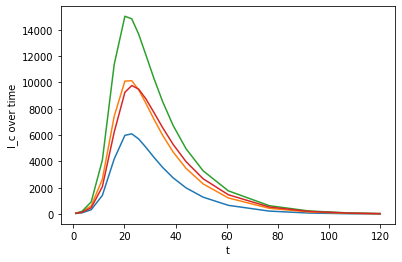

In [81]:
plt.plot(soln_obj.t, soln_obj.y[16:20].T)
plt.xlabel("t")
plt.ylabel("I_c over time")
plt.show()

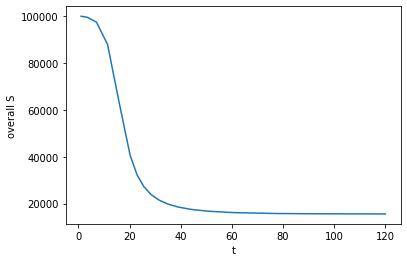

In [82]:
plt.plot(soln_obj.t, sum(soln_obj.y[0:16]))
plt.xlabel("t")
plt.ylabel("overall S")
plt.show()

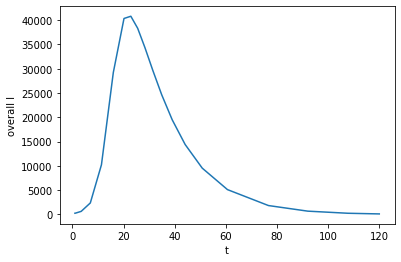

In [83]:
plt.plot(soln_obj.t, sum(soln_obj.y[16:20]))
plt.xlabel("t")
plt.ylabel("overall I")
plt.show()

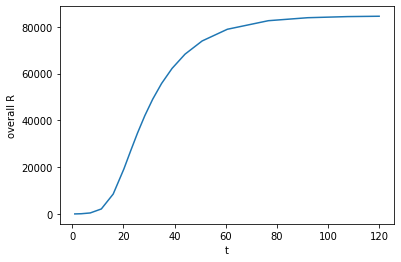

In [84]:
plt.plot(soln_obj.t, soln_obj.y[20].T)
plt.xlabel("t")
plt.ylabel("overall R")
plt.show()

In [85]:
I_0 = soln_obj.y[16]
I_1 = soln_obj.y[17]
I_2 = soln_obj.y[18]
I_3 = soln_obj.y[19]

IL_0 = (I_0*Lc[0])/N
IL_1 = (I_1*Lc[1])/N
IL_2 = (I_2*Lc[2])/N
IL_3 = (I_3*Lc[3])/N

Lsum1 = sum(IL_0, IL_1)
Lsum2 = sum(IL_2, IL_3)

overall_L = sum(Lsum1, Lsum2)
print(overall_L)

[4.10473485 4.10473489 4.10473533 4.10473978 4.10478679 4.1054726
 4.10889774 4.12484275 4.16640348 4.19660109 4.20172022 4.19901909
 4.1916094  4.18153608 4.16978479 4.15705052 4.14389853 4.13089623
 4.11874075 4.10945395 4.10611054 4.1048311  4.10442604]


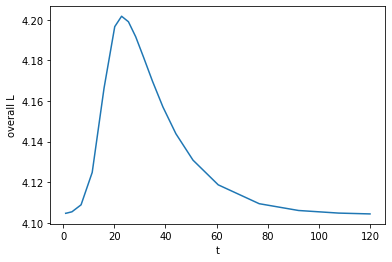

In [86]:
plt.plot(soln_obj.t, overall_L)
plt.xlabel("t")
plt.ylabel("overall L")
plt.show()